In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import clear_output
from IPython.display import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Image processing

Image processing is a method to perform some operations on an image, in order to get an enhanced image or to extract some useful information from it. It is a type of signal processing in which input is an image and output may be image or characteristics/features associated with that image.

- ### Importing the image via image acquisition tools;
- ### Analysing and manipulating the image;
- ### Output in which result can be altered image or report that is based on image analysis.



![title](img/Intensity.png)



- ### 이미지의 노이즈를 줄이거나, 분석하기 쉬운 형태로 변환할 수 있다.
- ### 여러 영상처리를 복합적으로 처리한다.
- ### 반드시 분석도구 이전에 사용되는 것은 아니며, 반대로 때에 따라 딥러닝을 '전처리' 용도로 먼저 사용할 수 있다.



## Examples of Geometric transformations

![title](img/geometric transformations.png)

### take-home-lessons
- stick with a main library as there are so many, e.g., cv2
- use skimage and mahotas as complement
- glue them via numpy array
- be careful with the dtype of images, e.g., float, uint8 and etc
- cv2 is different from others in terms of numpy format and method interface, but powerful on its own
- two types of domain: image domain (width, height, x, y) and ndimage domain (num_cols, num_rows, col, row). they are exactly opposite of each other

### things that cv2 is different/NOT good at
- read color images - it RETURNS BGR instead RGB!! **It doesnt matter which encoding is used, as long as it is consistent with the plotting system - cv2.imwrite, cv2.imshow and cv2.imread are using BGR, whereas plt.imshow and a lot of others use RGB**
- display within ipython notebook, instead use `plt` - DO remember to convert BGR to RGB! But you don't have to do that when using cv2.imshow, and all other cv2 methods for color images
- cv2 returned image matrix (np.ndarray) is very strict with the dtypes, or specially, only working with `np.uint8`

### read/write images

it is pretty safe to assume that opencv always represent images as uint8 (ubyte) ndarray

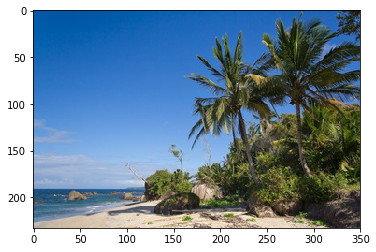

In [2]:
## RGB images - BGR to RGB
beach = cv2.imread("data/beach.jpg")[:,:,::-1]
plt.imshow(beach)

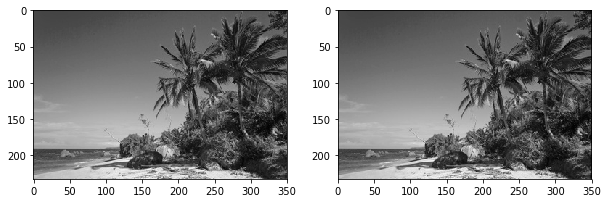

In [3]:
## gray scale - either load it directly
beach_gray = cv2.imread("data/beach.jpg", cv2.IMREAD_GRAYSCALE)

## or convert later - note beach is RGB now
beach_gray_converted = cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY)

## there are slight differences between the two versions
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(beach_gray, cmap = plt.cm.gray)
axes[1].imshow(beach_gray_converted, cmap = plt.cm.gray)

In [4]:
## save and convert to different formats - Notice it assumes BGR
cv2.imwrite("beach_new.jpg", beach[:,:,::-1])

True

### drawing on images

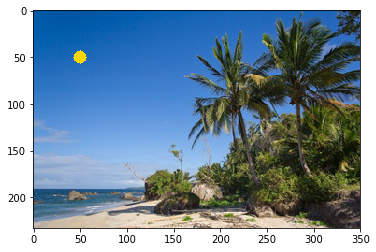

In [5]:
sunny_beach = beach.copy()
cv2.circle(sunny_beach, (50, 50), 7, color = (255, 215, 0), thickness = -1, )
plt.imshow(sunny_beach)

### padding images

Sometime it is useful to pad the image border like framing pictures, e.g. convolution. 
`copyMakeBorder` is the only method starting with the word copy in current opencv

(<matplotlib.axes._subplots.AxesSubplot at 0x7fddac0cec10>,
 Text(0.5,1,u'CONSTANT'))

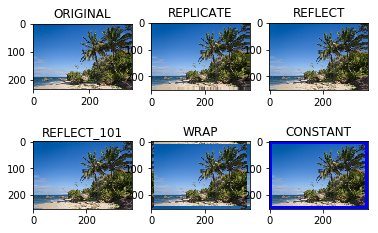

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = (0,0,255)

img1 = beach ## no need to explicitly copy

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')